<style>
    .zero-margin {
        margin: 0 px;
     }
</style>

<div class="zero-margin" style="text-align: center;">
    <p style="text-align: center; font-size: 20px; margin-bottom: 10px;">Practice Case 02<p>
    <p style="text-align: center; font-size: 40px; margin: 0px; font-weight: bold;text-transform: uppercase;">Exploratory Data Analysis</p><br/>
    <p  style="text-align: center; margin-bottom: 0px;">Tuesday, October 29th 2019</p>
     <p  style="text-align: center; margin-top: 0px;">M. Haries Ramdhani</p>
</div>

In [1]:
from IPython.display import Javascript, HTML

html_script = """
<style>
    @font-face {
        font-family: 'Source Sans Pro';
        src: url('SourceSansPro.ttf');
    }
    
    * {
        font-family: 'Source Sans Pro';
    }
    
    #header {
        background-color: 60659e
    }
    
    #notebook {
        background-color: #60659e;
    }
<style>
"""

HTML(html_script)

## Overview

The data is collected from a marketing campaign of a banking institution. The marketing campaigns were done on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. [Moro et al., 2014]



### Input variables:
#### Bank Client Data:
1\. **age** :(numeric)  
2\. **job** : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')  
3\. **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)  
4\. **education** : (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')  
5\. **default** : has credit in default? (categorical: 'no','yes','unknown')  
6\. **housing** : has housing loan? (categorical: 'no','yes','unknown')  
7\. **loan** : has personal loan? (categorical: 'no','yes','unknown')  

#### Related with the Last Contact of the Current Campaign:
8\. **contact** : contact communication type (categorical: 'cellular','telephone')   
9\. **month** : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')  
10\. **day_of_week** : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')  
11\. **duration** : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.  

#### Other Attributes:
12\. **campaign** : number of contacts performed during this campaign and for this client (numeric, includes last contact)  
13\. **pdays** : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
14\. **previous** : number of contacts performed before this campaign and for this client (numeric)  
15\. **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')  

#### Social and Economic Context Attributes
16\. **emp.var.rate** : employment variation rate - quarterly indicator (numeric)  
17\. **cons.price.idx** : consumer price index - monthly indicator (numeric)   
18\. **cons.conf.idx** : consumer confidence index - monthly indicator (numeric)   
19\. **euribor3m** : euribor 3 month rate - daily indicator (numeric)  
20\. **nr.employed**: number of employees - quarterly indicator (numeric)  

#### Output Variable (desired target):
21\. **y**: has the client subscribed a term deposit? (binary: 'yes','no')

### LIBRARY IMPORT

In [2]:
import pandas as pd
pd.set_option('display.max_columns', 500)

import numpy as np
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import gridspec

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("bank-marketing-full.csv", sep=";")

### DATA PREPARATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

At first the data looked fine without any missing values found in the dataset. After some explorations were performed it's found that `np.nan` values were encoded as other values, in this case `unknown

In [5]:
print(f"Initially, the data set contains {df.shape[0]} rows and {df.shape[1]} columns")

Initially, the data set contains 41188 rows and 21 columns


In [6]:
# Get a preview of the data
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


### HANDLING MISSING VALUES

In [8]:
# Replacing all of the unknowns with null
df = df.replace({'unknown': np.nan})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               40858 non-null object
marital           41108 non-null object
education         39457 non-null object
default           32591 non-null object
housing           40198 non-null object
loan              40198 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
# Get the summary statistics of the data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


,total,percent
default,8597,0.208726
education,1731,0.042027
housing,990,0.024036
loan,990,0.024036
job,330,0.008012


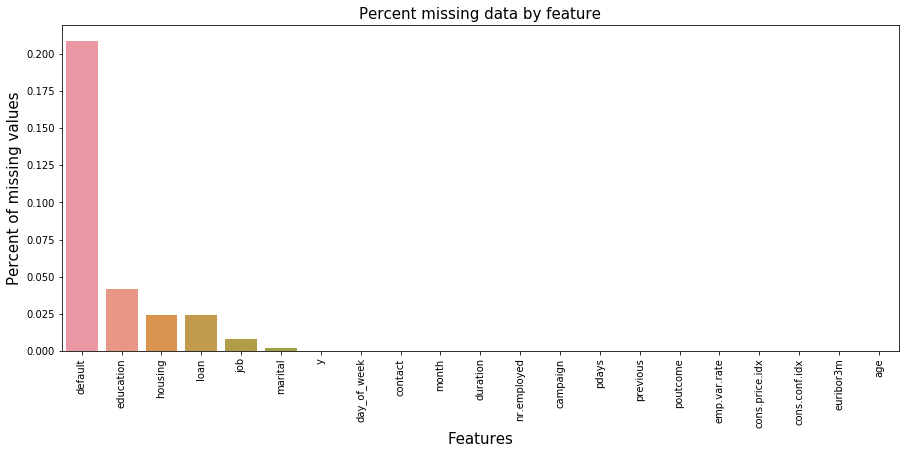

In [11]:
# Look for the missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['total', 'percent'])

f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')

sns.barplot(x=missing_data.index, y=missing_data['percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

missing_data.head()

Looking at the DataFrame and the bar chart above it's found that default has the highest missing values with a total of 21%. Followed by education (4%), housing and loan, both with 2% missing values

### GROUPING DATA BASED ON DTYPES

In [12]:
# Get the numerical features in the data set
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [13]:
# Get the numerical features in the data set
categorical_features = df.select_dtypes(include=[np.object])
categorical_features.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [14]:
# Count the unique values of each of the categorical features
for categorical_feature in categorical_features.columns:
    unique_value_count = df[categorical_feature].unique().shape[0]
    print(f"The {categorical_feature} has {unique_value_count} unique values")

The job has 12 unique values
The marital has 4 unique values
The education has 8 unique values
The default has 3 unique values
The housing has 3 unique values
The loan has 3 unique values
The contact has 2 unique values
The month has 10 unique values
The day_of_week has 5 unique values
The poutcome has 3 unique values
The y has 2 unique values


All of the categorical features that have two unique values (for this case 'yes' and 'no') will then be converted to binary

### TRANSFORM CATEGORICAL DATA TO BINARY DATA

To make it easy for the model to interpret the categorical data of `yes` and `no` were converted to `1`s and `0`s

In [15]:
# Transforming the binary columns of 'yes' and 'no' to 1s and 0s
binary_columns = ["default", "housing", "loan", "y"]

for binary_column in binary_columns:
    df[binary_column] = df[binary_column].apply(lambda x : 1 if x == 'yes' else 0)

In [16]:
# Preview of the transformed binary columns
df[binary_columns].head()

,default,housing,loan,y
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,0,0
4,0,0,1,0


### DROP DUPLICATES

In [17]:
number_of_duplicates_unique = df[df.drop("y", axis=1).duplicated()].shape[0]
number_of_duplicates = df[df.drop("y", axis=1).duplicated(keep=False)].shape[0]

print(f"There is a total of {number_of_duplicates_unique} duplicated unique rows in the data set")
print(f"There is a total of {number_of_duplicates} duplicated rows in the data set")

There is a total of 14 duplicated unique rows in the data set
There is a total of 28 duplicated rows in the data set


Since it is stated that *'Often, more than one contact to the same client was required'* I hypothesized that maybe there are clients who were contacted more than once. My initial assumptions are:
1. The client who are contacted twice may have had different response (drop **y**)
2. The client who are contacted twice may have been contacted in the different month (drop **month**)
3. The client who are contacted twice may have been contacted in the same monthbut different day (drop [**day_of_week**, **month**])

In [18]:
dropped_columns = ["y", "month", ["day_of_week", "month"]]
duplicate_counts = []

for dropped_column in dropped_columns:
    duplicate_count = df[df.drop("month", axis=1).duplicated(keep=False)].shape[0]
    duplicate_counts.append(duplicate_count)

In [19]:
pd.DataFrame({"dropped_columns": dropped_columns, "duplicate_count": duplicate_counts})

,dropped_columns,duplicate_count
0,y,28
1,month,28
2,"[day_of_week, month]",28


Even after dropping several columns, the duplicated row number stays the same. Thus we can assume that the customers were contacted twice at max

In [20]:
# Drop the duplicates
df = df.drop_duplicates()

Looking at the result above we can assume that those 14 rows have one duplicate each

### SKEWNESS AND KURTOSIS

In [21]:
# See the skewness of the distribution of the numerical variable
df.skew()

age                 0.784604
default           117.143786
housing            -0.095610
loan                1.941421
duration            3.262748
campaign            4.761966
pdays              -4.921252
previous            3.831288
emp.var.rate       -0.723985
cons.price.idx     -0.230825
cons.conf.idx       0.302983
euribor3m          -0.709117
nr.employed        -1.044253
y                   2.450108
dtype: float64

In [22]:
# See the kurtosis of the distribution of the numerical variable
df.kurtosis()

age                   0.791372
default           13721.333090
housing              -1.990955
loan                  1.769202
duration             20.243157
campaign             36.970631
pdays                22.220234
previous             20.101055
emp.var.rate         -1.062807
cons.price.idx       -0.829914
cons.conf.idx        -0.358989
euribor3m            -1.406900
nr.employed          -0.003697
y                     4.003226
dtype: float64

As can be seen from the result above, only `age`, `emp.var.rate`, `cons.price.idx`, `cons.conf.idx` and `euribor3m` are having skewness closer to normal distribution (skewness closer to 0) it's different from `campaign` and `pdays` which are highly skewed.

`pdays`, `emp.var.rate`, `cons.price.idx`, `euribor3m` and `nr.employed` are skewed left while the others are skewed right.

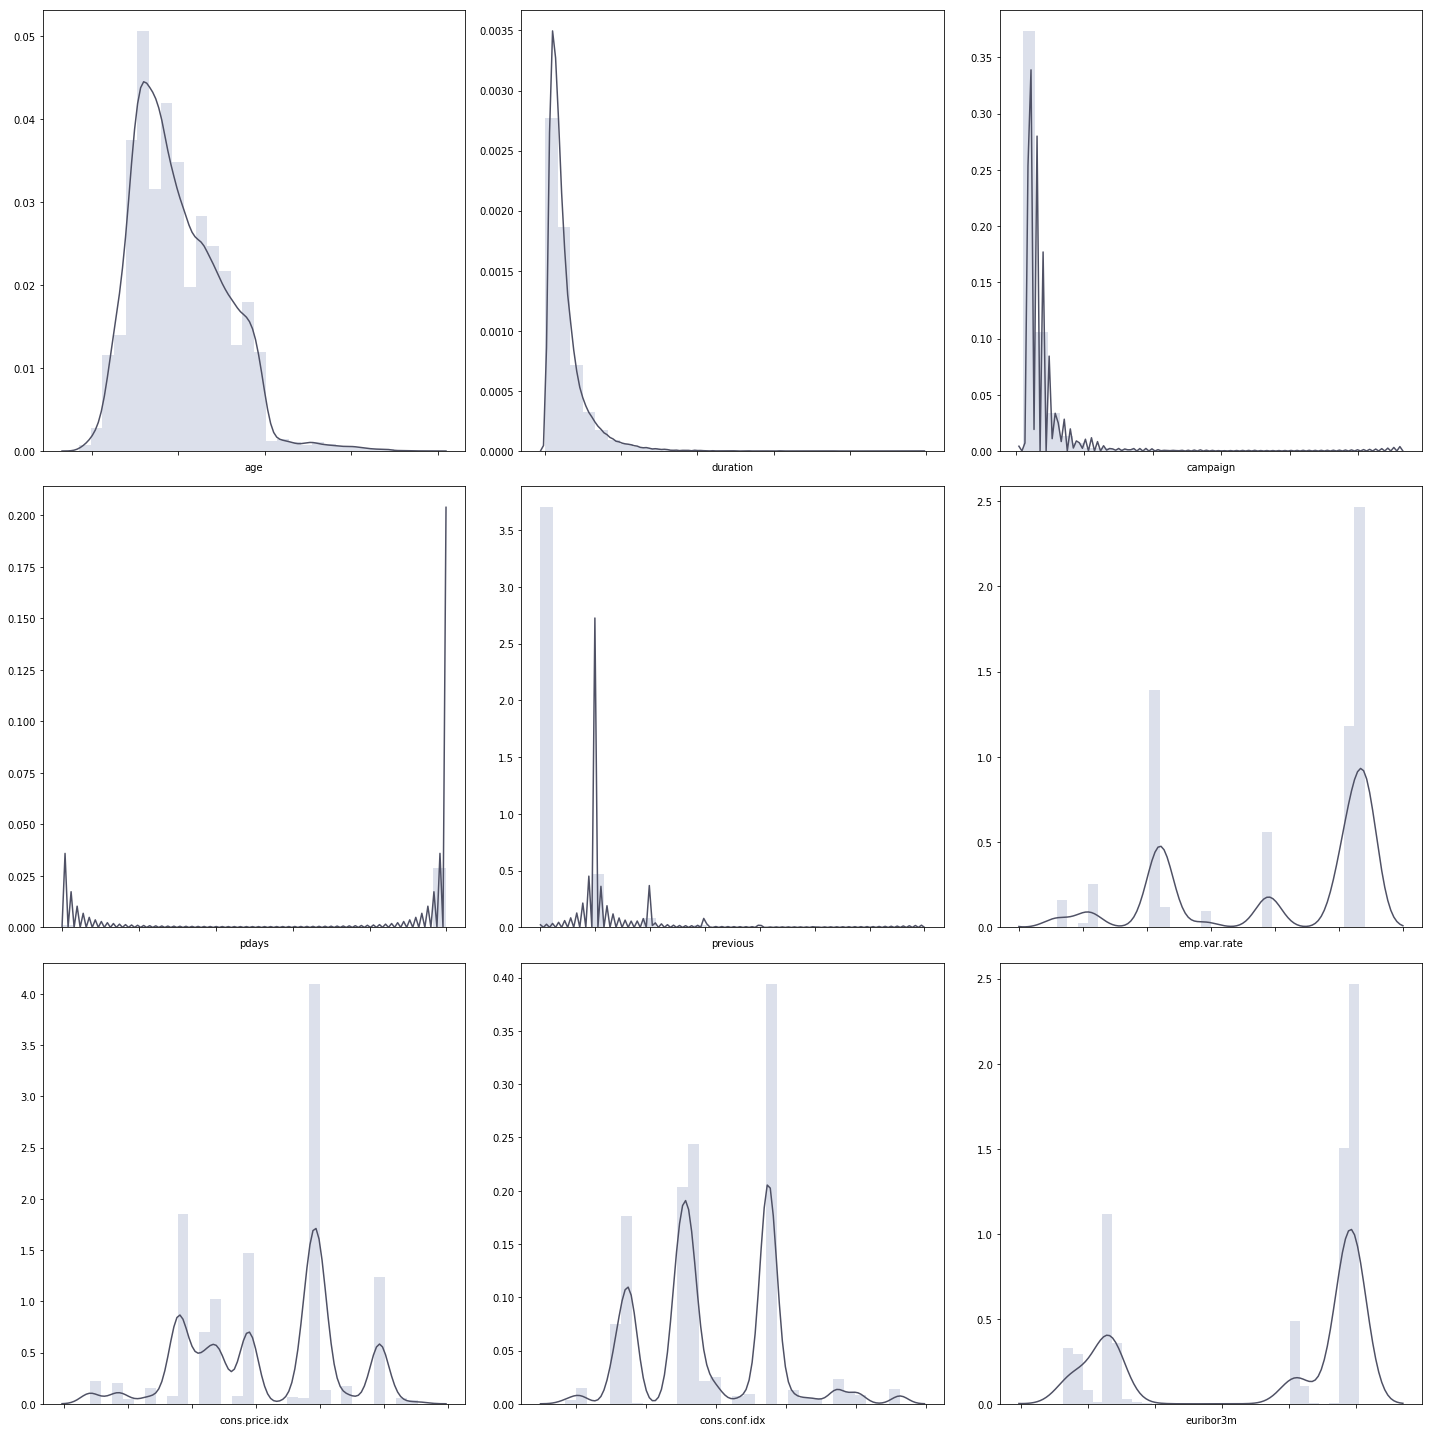

In [23]:
colors = ["#A9B3CD", "#F8785F"]
custom_palette = sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(round(len(numerical_features.columns) / 3), 3, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_features.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.distplot(df[numerical_features.columns[i]], bins =30, kde_kws={"color": "#4F5165"}, ax=ax)

fig.tight_layout()

This is the distribution depiction of the skewness and the kurtosis calculated above

### OUTLIERNESS BASED ON THE IQR

In [24]:
# Count the outlierness of each feature based on the IQR of the numerical features
print("BASED ON THE IQR")
print("--------------------------")

for numerical_feature in numerical_features.columns:
    q3, q1 = numerical_features[numerical_feature].describe().loc[["75%", "25%"]].values
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outlier_count = df[(numerical_features[numerical_feature] < lower_bound) | (numerical_features[numerical_feature] > upper_bound)].shape[0]
    percentage = round(outlier_count/df.shape[0], 2)
    print(f"The {numerical_feature} has {outlier_count} ({percentage}%) outliers")

BASED ON THE IQR
--------------------------
The age has 468 (0.01%) outliers
The duration has 2963 (0.07%) outliers
The campaign has 2406 (0.06%) outliers
The pdays has 1515 (0.04%) outliers
The previous has 5625 (0.14%) outliers
The emp.var.rate has 0 (0.0%) outliers
The cons.price.idx has 0 (0.0%) outliers
The cons.conf.idx has 446 (0.01%) outliers
The euribor3m has 0 (0.0%) outliers
The nr.employed has 0 (0.0%) outliers


In [25]:
df["previous"].value_counts().reset_index().rename(columns={"index":"previous_contact", "previous": "count"})

,previous_contact,count
0,0,35549
1,1,4561
2,2,754
3,3,216
4,4,70
5,5,18
6,6,5
7,7,1


Previous has a very high percentage of having outlier, but if we can see the value coutns of the feature previous we found that the majority of the clients are having a `0` value for previous means that the clients have never been contacted before. So looking at this fact we can conclude that it's not an outlier. While the value `7` may have also been an outlier (Further investigation needs to be performed).

### FEATURE TO FEATURE RELATIONSHIP

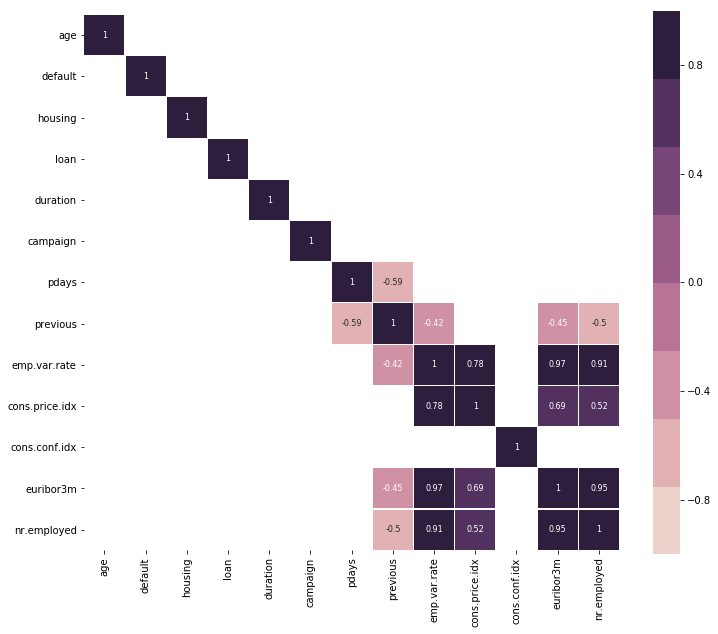

In [26]:
# Looking at the highly correlated features
corr = df.drop('y', axis=1).corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap=sns.cubehelix_palette(8), vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Looking at the heatmap above, we can see that several features are highly correlated with the others.  
- `emp.var.rate` who are highly correlated with `euribor3m`, this might be caused by thow the `emp.var.rate` is calculated (the formula of either of them)
- The `previous` attribute is also having a negative correlation with the `pdays` attribute, this is because of the fact that the client who is previously contacted will also have the pdays attribute (number of days that passed by after the client was last contacted from a previous campaign

### CATEGORICAL DATA TO TARGET

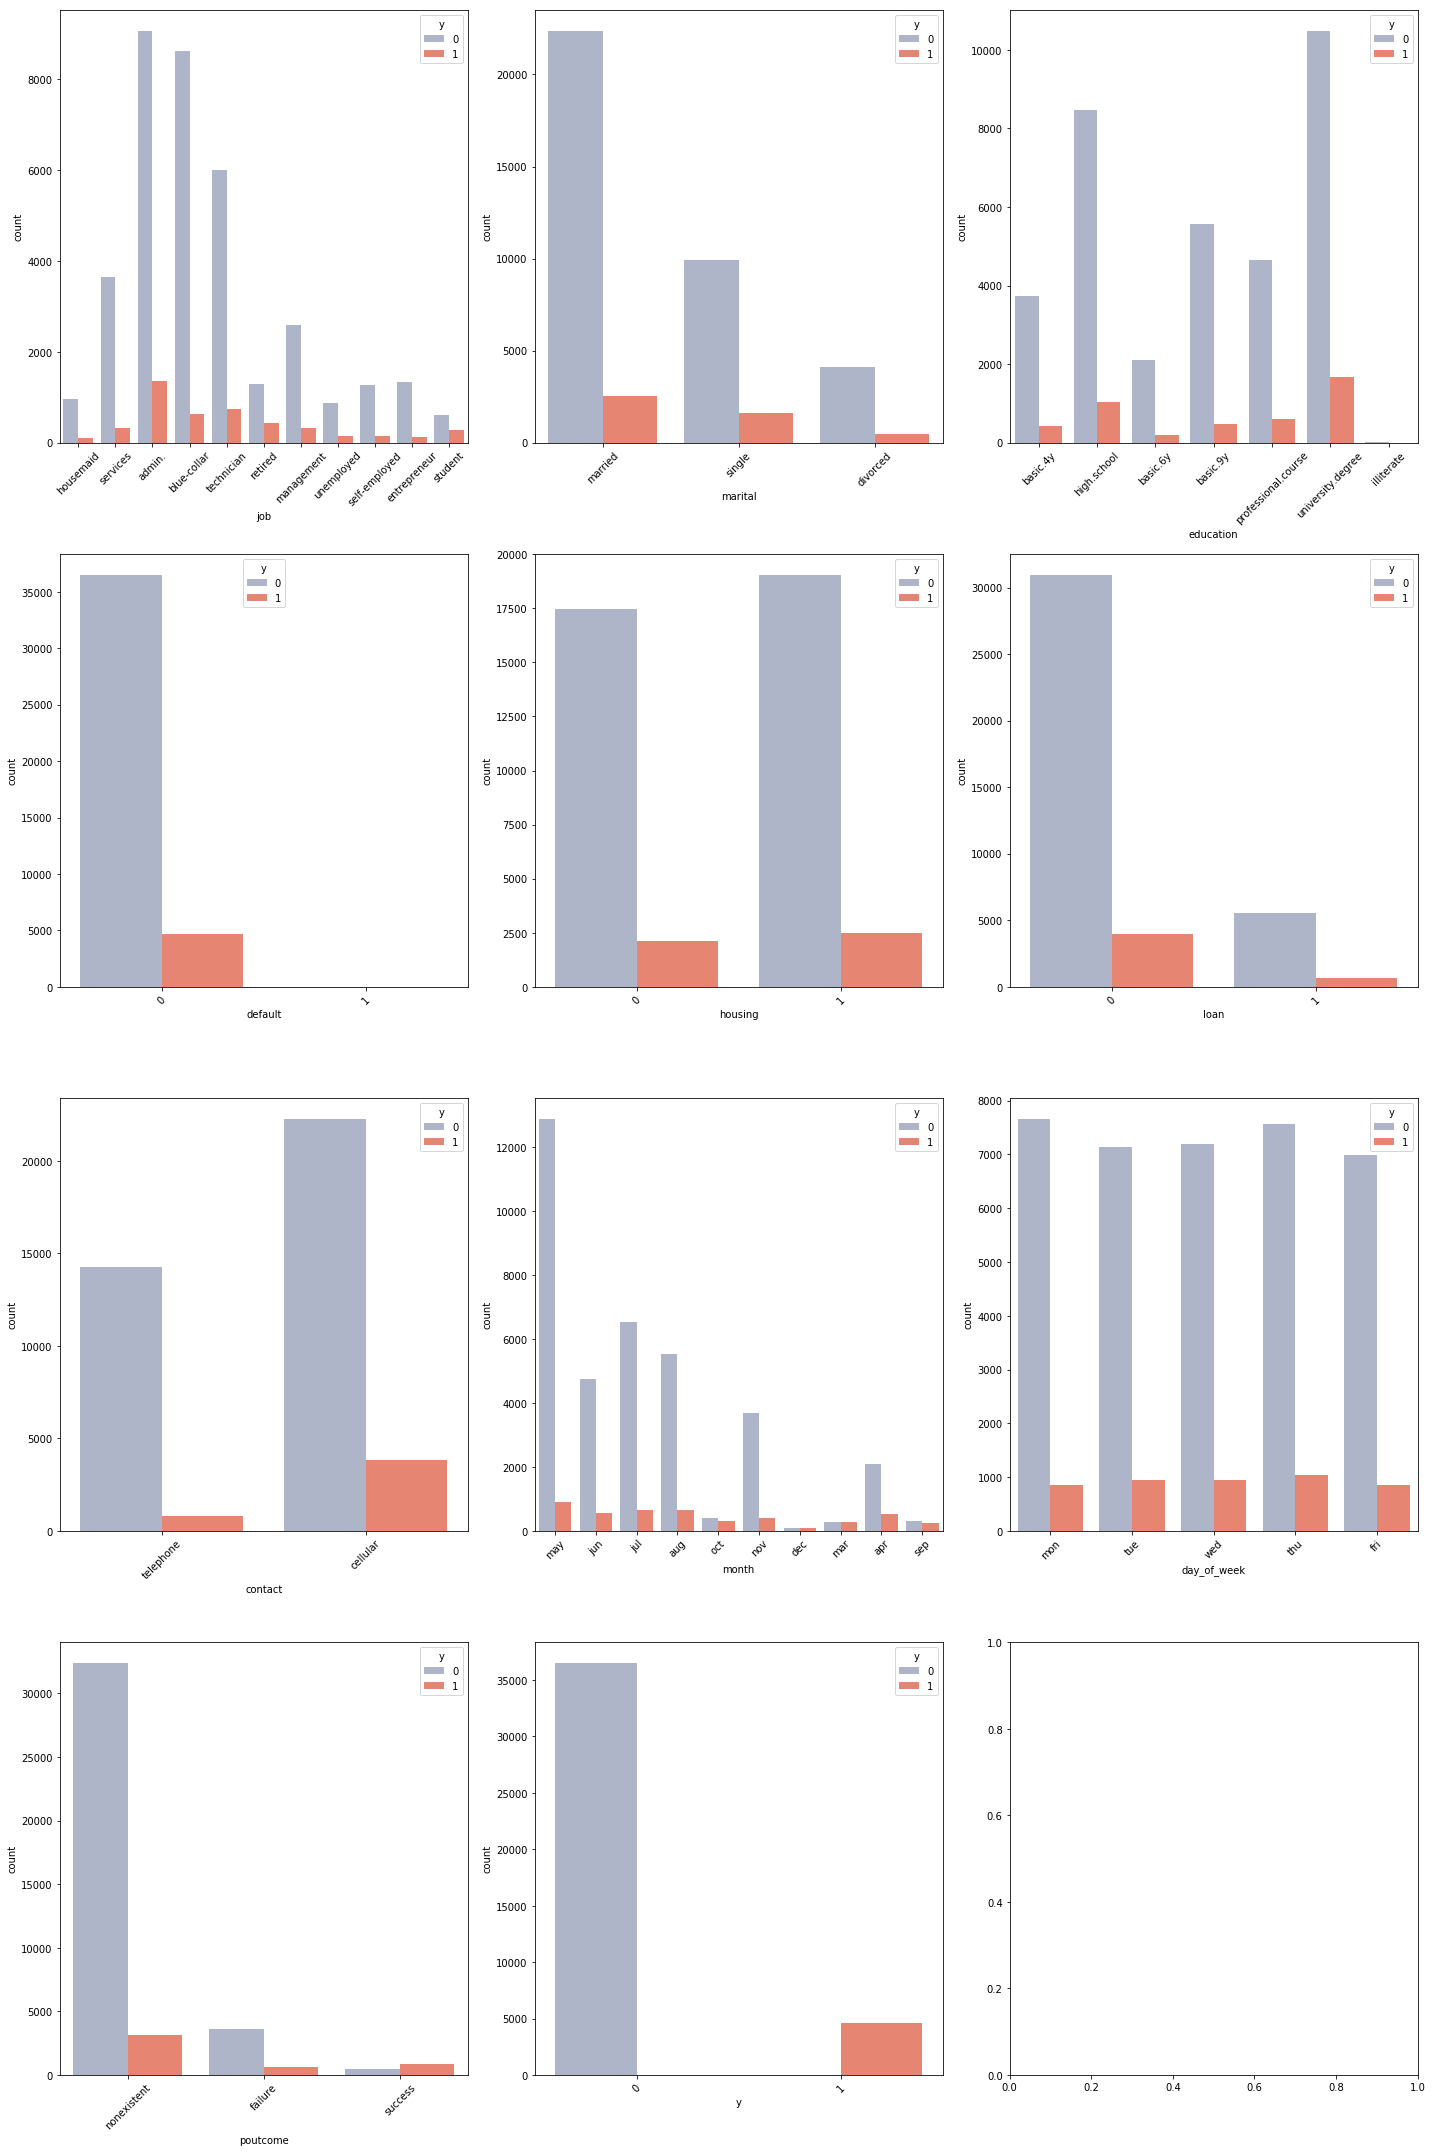

In [27]:
colors = ["#A9B3CD", "#F8785F"]
custom_palette = sns.set_palette(sns.color_palette(colors))

fig, axes = plt.subplots(round(len(categorical_features.columns) / 3), 3, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    if i < len(categorical_features.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(ax=ax, x=categorical_features.columns[i], hue='y', data=df, palette=custom_palette)

fig.tight_layout()

In [28]:
job_counts = df.groupby(["job", "y"]).count()[["age"]].rename(columns={"age": "count"})
job_counts["percentage"] = job_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

job_counts

count  percentage
job           y                   
admin.        0   9067   87.032060
              1   1351   12.967940
blue-collar   0   8614   93.104194
              1    638    6.895806
entrepreneur  0   1332   91.483516
              1    124    8.516484
housemaid     0    954   90.000000
              1    106   10.000000
management    0   2596   88.782490
              1    328   11.217510
retired       0   1284   74.738068
              1    434   25.261932
self-employed 0   1272   89.514426
              1    149   10.485574
services      0   3644   91.857827
              1    323    8.142173
student       0    600   68.571429
              1    275   31.428571
technician    0   6009   89.167532
              1    730   10.832468
unemployed    0    870   85.798817
              1    144   14.201183

- Student has a tendency to subscribe the highest with a percentage of 31%. This can also be caused by the fact that the student population in the dataset is very small compared to the rest thus they appear to have a tendency to subscribe. Looking at this fact we can also assume that maybe we need to increase the no. of students to contact since they responded it well.
- Retired customers come in the 2nd place with 25% chance responding to subscribe
- Surprisingly people who are unemployed don't really perform well (in term of subscribing, assuming that the unemployed are the ones who need money)
- Blue collar workers happened to be the job type where the clients responded `yes` the least

In [29]:
education_counts = df.groupby(["education", "y"]).count()[["age"]].rename(columns={"age": "count"})
education_counts["percentage"] = education_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

education_counts

count  percentage
education           y                   
basic.4y            0   3747   89.748503
                    1    428   10.251497
basic.6y            0   2103   91.793976
                    1    188    8.206024
basic.9y            0   5572   92.175352
                    1    473    7.824648
high.school         0   8481   89.161060
                    1   1031   10.838940
illiterate          0     14   77.777778
                    1      4   22.222222
professional.course 0   4645   88.645038
                    1    595   11.354962
university.degree   0  10494   86.278056
                    1   1669   13.721944

- People who are illiterate have the likelihood to subscribe the biggest (Probably due to the small population)
- People with university degrees are the ones who were contacted the most and also came in the 2nd place in term of responding with a `yes`

In [30]:
marital_counts = df.groupby(["marital", "y"]).count()[["age"]].rename(columns={"age": "count"})
marital_counts["percentage"] = marital_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

marital_counts

count  percentage
marital  y                   
divorced 0   4135   89.676860
         1    476   10.323140
married  0  22388   89.843092
         1   2531   10.156908
single   0   9944   85.991007
         1   1620   14.008993

- Based on the marital status of the clients, there are no really big difference for different marital status

In [31]:
contact_counts = df.groupby(["contact", "y"]).count()[["age"]].rename(columns={"age": "count"})
contact_counts["percentage"] = contact_counts.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

contact_counts

count  percentage
contact   y                   
cellular  0  22282   85.260580
          1   3852   14.739420
telephone 0  14253   94.767287
          1    787    5.232713

- People who used cellular phone has a higher chance to respond compared to those who used telephone